# Regression: From Basics to Advanced
## A Comprehensive Guide to Regression Techniques

This notebook covers:
1. **Linear Regression** - Simple and Multiple
2. **Polynomial Regression**
3. **Regularization Techniques** - Ridge and Lasso
4. **Logistic Regression**
5. **Advanced Techniques** - SVR, Gradient Boosting, etc.

---

## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

---
# Part 1: Linear Regression - The Foundation

## 1.1 Simple Linear Regression (One Feature)

**Concept**: 
- Simplest form of regression
- Relationship: y = mx + b
- m: slope, b: intercept

**Use Case**: Predicting house prices based on house area

In [2]:
X_simple = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y_simple = np.array([2, 4, 5, 4, 5, 7, 8, 8, 9, 10]) + np.random.normal(0, 0.5, 10)

lr_simple = LinearRegression()
lr_simple.fit(X_simple, y_simple)

y_pred_simple = lr_simple.predict(X_simple)

print("Simple Linear Regression Results:")
print(f"Slope (m): {lr_simple.coef_[0]:.4f}")
print(f"Intercept (b): {lr_simple.intercept_:.4f}")
print(f"R² Score: {r2_score(y_simple, y_pred_simple):.4f}")
print(f"MSE: {mean_squared_error(y_simple, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_simple, y_pred_simple)):.4f}")

Simple Linear Regression Results:
Slope (m): 0.8208
Intercept (b): 1.9097
R² Score: 0.9274
MSE: 0.4351
RMSE: 0.6596


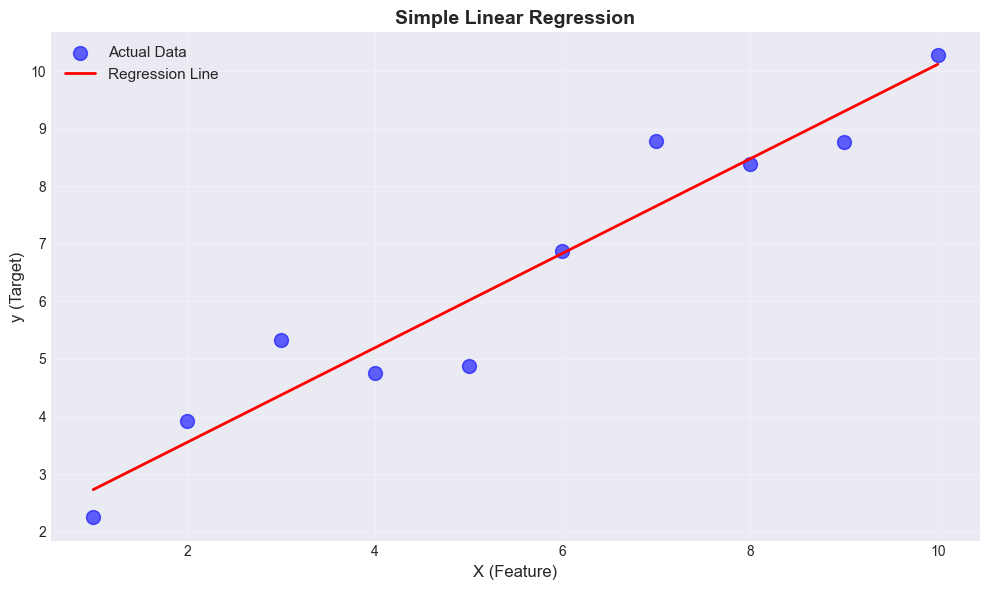

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, color='blue', s=100, label='Actual Data', alpha=0.6)
plt.plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title('Simple Linear Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 1.2 Multiple Linear Regression (Multiple Features)

**Concept**:
- Multiple independent variables
- Equation: y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

**Use Case**: Predicting house prices based on area, bedrooms, bathrooms, etc.

In [4]:
np.random.seed(42)
n_samples = 100

X_multi = np.random.rand(n_samples, 3) * 100
y_multi = 0.5 * X_multi[:, 0] + 0.3 * X_multi[:, 1] + 0.2 * X_multi[:, 2] + np.random.normal(0, 5, n_samples)

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_train = lr_multi.predict(X_train)
y_pred_test = lr_multi.predict(X_test)

print("Multiple Linear Regression Results:")
print(f"Coefficients: {lr_multi.coef_}")
print(f"Intercept: {lr_multi.intercept_:.4f}")
print(f"Train R² Score: {r2_score(y_train, y_pred_train):.4f}")
print(f"Test R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

Multiple Linear Regression Results:
Coefficients: [0.50529488 0.2962303  0.23430296]
Intercept: -0.4251
Train R² Score: 0.9475
Test R² Score: 0.8865
Train RMSE: 4.1841
Test RMSE: 7.1017


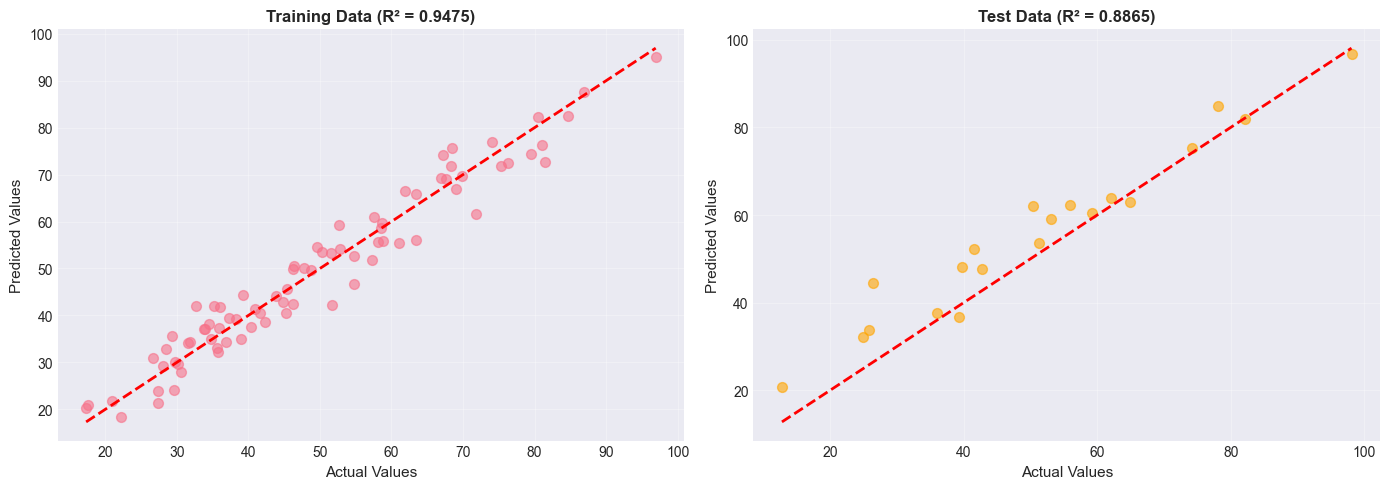

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_pred_train, alpha=0.6, s=50)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values', fontsize=11)
axes[0].set_ylabel('Predicted Values', fontsize=11)
axes[0].set_title(f'Training Data (R² = {r2_score(y_train, y_pred_train):.4f})', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test, y_pred_test, alpha=0.6, s=50, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values', fontsize=11)
axes[1].set_ylabel('Predicted Values', fontsize=11)
axes[1].set_title(f'Test Data (R² = {r2_score(y_test, y_pred_test):.4f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# Part 2: Polynomial Regression

## When Linear Relationships Don't Fit

**Concept**:
- Captures non-linear relationships
- Uses polynomial features: x², x³, etc.
- Still a linear model but with transformed features

**Equation**: y = b₀ + b₁x + b₂x² + b₃x³ + ...

In [6]:
X_poly = np.linspace(-5, 5, 100).reshape(-1, 1)
y_poly = 0.5 * X_poly.ravel()**2 + 2 * X_poly.ravel() + 3 + np.random.normal(0, 3, 100)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y_poly, test_size=0.2, random_state=42
)

lr_linear = LinearRegression()
lr_linear.fit(X_poly_train, y_poly_train)
y_pred_linear = lr_linear.predict(X_poly_test)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_transformed = poly_features.fit_transform(X_poly_train)
X_poly_test_transformed = poly_features.transform(X_poly_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train_transformed, y_poly_train)
y_pred_poly = lr_poly.predict(X_poly_test_transformed)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train_transformed_3 = poly_features_3.fit_transform(X_poly_train)
X_poly_test_transformed_3 = poly_features_3.transform(X_poly_test)

lr_poly_3 = LinearRegression()
lr_poly_3.fit(X_poly_train_transformed_3, y_poly_train)
y_pred_poly_3 = lr_poly_3.predict(X_poly_test_transformed_3)

print("Polynomial Regression Comparison:")
print(f"Linear R² (Test): {r2_score(y_poly_test, y_pred_linear):.4f}")
print(f"Polynomial Degree 2 R² (Test): {r2_score(y_poly_test, y_pred_poly):.4f}")
print(f"Polynomial Degree 3 R² (Test): {r2_score(y_poly_test, y_pred_poly_3):.4f}")

Polynomial Regression Comparison:
Linear R² (Test): 0.5733
Polynomial Degree 2 R² (Test): 0.9011
Polynomial Degree 3 R² (Test): 0.8970


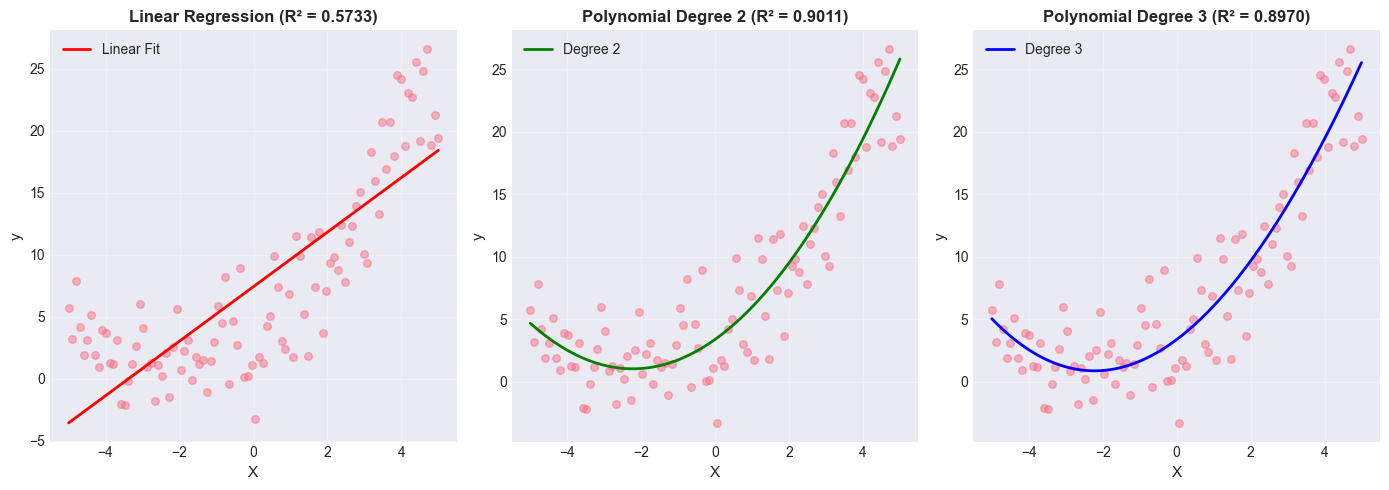

In [7]:
X_plot = np.linspace(X_poly.min(), X_poly.max(), 300).reshape(-1, 1)

y_pred_linear_plot = lr_linear.predict(X_plot)
y_pred_poly_plot = lr_poly.predict(poly_features.transform(X_plot))
y_pred_poly_3_plot = lr_poly_3.predict(poly_features_3.transform(X_plot))

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_poly, y_poly, alpha=0.5, s=30)
plt.plot(X_plot, y_pred_linear_plot, 'r-', linewidth=2, label='Linear Fit')
plt.xlabel('X', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.title(f'Linear Regression (R² = {r2_score(y_poly_test, y_pred_linear):.4f})', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(X_poly, y_poly, alpha=0.5, s=30)
plt.plot(X_plot, y_pred_poly_plot, 'g-', linewidth=2, label='Degree 2')
plt.xlabel('X', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.title(f'Polynomial Degree 2 (R² = {r2_score(y_poly_test, y_pred_poly):.4f})', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(X_poly, y_poly, alpha=0.5, s=30)
plt.plot(X_plot, y_pred_poly_3_plot, 'b-', linewidth=2, label='Degree 3')
plt.xlabel('X', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.title(f'Polynomial Degree 3 (R² = {r2_score(y_poly_test, y_pred_poly_3):.4f})', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# Part 3: Regularization Techniques

## Preventing Overfitting with Ridge and Lasso

### 3.1 Ridge Regression (L2 Regularization)

**Concept**:
- Adds penalty for large coefficients
- Shrinks coefficients but doesn't eliminate them
- Cost: MSE + α * (sum of squared coefficients)

**When to use**: When you want to keep all features

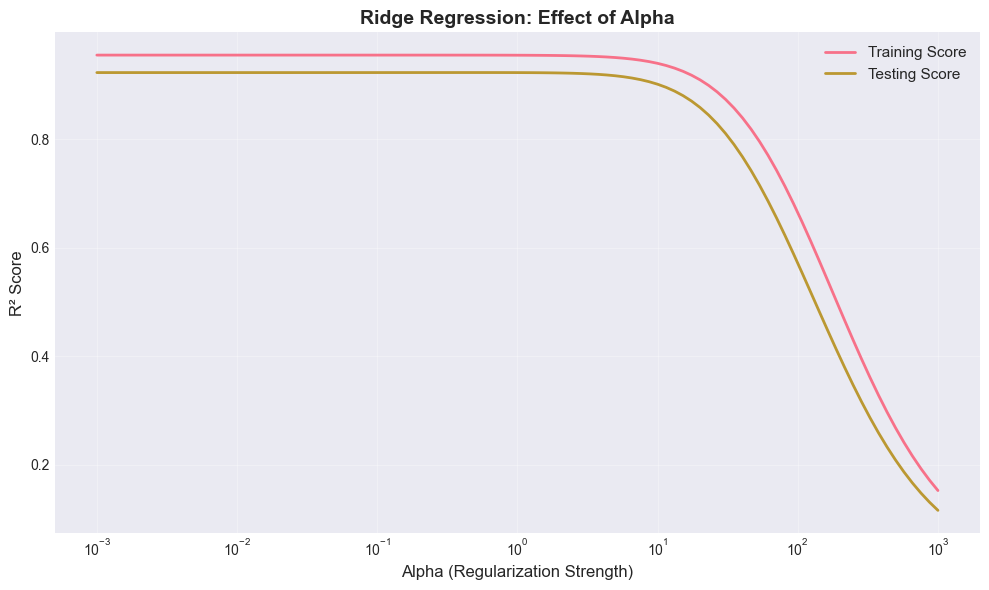

Optimal Alpha: 0.4642
Best Test R² Score: 0.9231


In [8]:
np.random.seed(42)
n_samples = 100
n_features = 20

X_ridge = np.random.randn(n_samples, n_features)
true_coef = np.random.randn(n_features)
y_ridge = X_ridge @ true_coef + np.random.normal(0, 1, n_samples)

scaler = StandardScaler()
X_ridge_scaled = scaler.fit_transform(X_ridge)

X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(
    X_ridge_scaled, y_ridge, test_size=0.2, random_state=42
)

alphas = np.logspace(-3, 3, 100)
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_ridge_train, y_ridge_train)
    train_scores.append(ridge.score(X_ridge_train, y_ridge_train))
    test_scores.append(ridge.score(X_ridge_test, y_ridge_test))

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores, label='Training Score', linewidth=2)
plt.semilogx(alphas, test_scores, label='Testing Score', linewidth=2)
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Ridge Regression: Effect of Alpha', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_idx = np.argmax(test_scores)
optimal_alpha = alphas[optimal_idx]
print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Best Test R² Score: {test_scores[optimal_idx]:.4f}")

In [9]:
ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_ridge_train, y_ridge_train)

lr_compare = LinearRegression()
lr_compare.fit(X_ridge_train, y_ridge_train)

print("Comparison: Linear Regression vs Ridge Regression")
print(f"Linear Regression - Train R²: {lr_compare.score(X_ridge_train, y_ridge_train):.4f}")
print(f"Linear Regression - Test R²: {lr_compare.score(X_ridge_test, y_ridge_test):.4f}")
print(f"Ridge (α={optimal_alpha:.4f}) - Train R²: {ridge_optimal.score(X_ridge_train, y_ridge_train):.4f}")
print(f"Ridge (α={optimal_alpha:.4f}) - Test R²: {ridge_optimal.score(X_ridge_test, y_ridge_test):.4f}")

print(f"Linear Regression - Avg |Coefficient|: {np.mean(np.abs(lr_compare.coef_)):.4f}")
print(f"Ridge Regression - Avg |Coefficient|: {np.mean(np.abs(ridge_optimal.coef_)):.4f}")

Comparison: Linear Regression vs Ridge Regression
Linear Regression - Train R²: 0.9553
Linear Regression - Test R²: 0.9231
Ridge (α=0.4642) - Train R²: 0.9552
Ridge (α=0.4642) - Test R²: 0.9231
Linear Regression - Avg |Coefficient|: 0.7212
Ridge Regression - Avg |Coefficient|: 0.7153


### 3.2 Lasso Regression (L1 Regularization)

**Concept**:
- Adds penalty for absolute value of coefficients
- Can shrink coefficients to exactly zero (feature selection)
- Cost: MSE + α * (sum of absolute coefficients)

**When to use**: When you want automatic feature selection

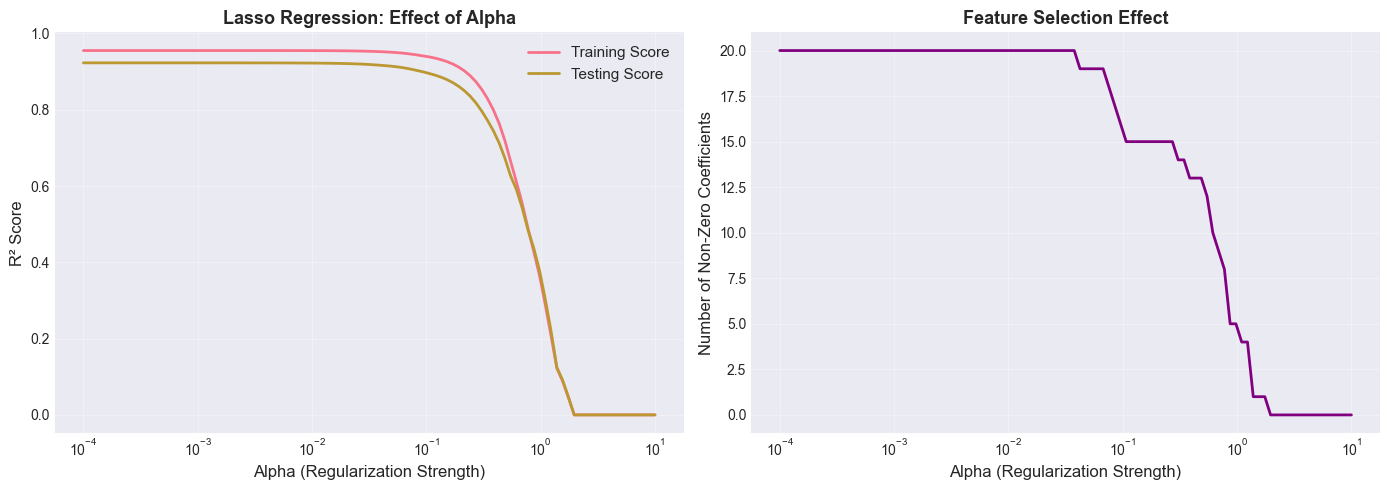

Optimal Alpha for Lasso: 0.0001
Best Test R² Score: 0.9231
Number of Features Selected: 20 out of 20


In [10]:
alphas_lasso = np.logspace(-4, 1, 100)
train_scores_lasso = []
test_scores_lasso = []
non_zero_coefs = []

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_ridge_train, y_ridge_train)
    train_scores_lasso.append(lasso.score(X_ridge_train, y_ridge_train))
    test_scores_lasso.append(lasso.score(X_ridge_test, y_ridge_test))
    non_zero_coefs.append(np.sum(lasso.coef_ != 0))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].semilogx(alphas_lasso, train_scores_lasso, label='Training Score', linewidth=2)
axes[0].semilogx(alphas_lasso, test_scores_lasso, label='Testing Score', linewidth=2)
axes[0].set_xlabel('Alpha (Regularization Strength)', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Lasso Regression: Effect of Alpha', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].semilogx(alphas_lasso, non_zero_coefs, linewidth=2, color='purple')
axes[1].set_xlabel('Alpha (Regularization Strength)', fontsize=12)
axes[1].set_ylabel('Number of Non-Zero Coefficients', fontsize=12)
axes[1].set_title('Feature Selection Effect', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_idx_lasso = np.argmax(test_scores_lasso)
optimal_alpha_lasso = alphas_lasso[optimal_idx_lasso]
print(f"Optimal Alpha for Lasso: {optimal_alpha_lasso:.4f}")
print(f"Best Test R² Score: {test_scores_lasso[optimal_idx_lasso]:.4f}")
print(f"Number of Features Selected: {non_zero_coefs[optimal_idx_lasso]} out of {n_features}")

In [11]:
lasso_optimal = Lasso(alpha=optimal_alpha_lasso, max_iter=5000)
lasso_optimal.fit(X_ridge_train, y_ridge_train)

print("Comparison: Linear vs Ridge vs Lasso")
print(f"Linear Regression:")
print(f"  Train R²: {lr_compare.score(X_ridge_train, y_ridge_train):.4f}")
print(f"  Test R²: {lr_compare.score(X_ridge_test, y_ridge_test):.4f}")
print(f"  Avg |Coef|: {np.mean(np.abs(lr_compare.coef_)):.4f}")

print(f"Ridge (α={optimal_alpha:.4f}):")
print(f"  Train R²: {ridge_optimal.score(X_ridge_train, y_ridge_train):.4f}")
print(f"  Test R²: {ridge_optimal.score(X_ridge_test, y_ridge_test):.4f}")
print(f"  Avg |Coef|: {np.mean(np.abs(ridge_optimal.coef_)):.4f}")

print(f"Lasso (α={optimal_alpha_lasso:.4f}):")
print(f"  Train R²: {lasso_optimal.score(X_ridge_train, y_ridge_train):.4f}")
print(f"  Test R²: {lasso_optimal.score(X_ridge_test, y_ridge_test):.4f}")
print(f"  Avg |Coef|: {np.mean(np.abs(lasso_optimal.coef_)):.4f}")
print(f"  Non-Zero Coefs: {np.sum(lasso_optimal.coef_ != 0)} out of {n_features}")

Comparison: Linear vs Ridge vs Lasso
Linear Regression:
  Train R²: 0.9553
  Test R²: 0.9231
  Avg |Coef|: 0.7212
Ridge (α=0.4642):
  Train R²: 0.9552
  Test R²: 0.9231
  Avg |Coef|: 0.7153
Lasso (α=0.0001):
  Train R²: 0.9553
  Test R²: 0.9231
  Avg |Coef|: 0.7210
  Non-Zero Coefs: 20 out of 20


---
# Part 4: Logistic Regression

## Classification with Regression

**Concept**:
- Despite the name, it's a classification algorithm
- Uses sigmoid function to map to [0, 1] probabilities
- Binary classification: predicting 0 or 1

**Equation**: P(y=1) = 1 / (1 + e^(-z))

In [12]:
from sklearn.datasets import make_classification

X_class, y_class = make_classification(
    n_samples=300, n_features=2, n_redundant=0, 
    n_clusters_per_class=1, random_state=42
)

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_class_train, y_class_train)

y_pred_class = log_reg.predict(X_class_test)
y_pred_proba = log_reg.predict_proba(X_class_test)[:, 1]

print("Logistic Regression Results:")
print(f"Train Accuracy: {log_reg.score(X_class_train, y_class_train):.4f}")
print(f"Test Accuracy: {log_reg.score(X_class_test, y_class_test):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_class_test, y_pred_class, target_names=['Class 0', 'Class 1']))

cm = confusion_matrix(y_class_test, y_pred_class)
print(f"\nConfusion Matrix:")
print(cm)

Logistic Regression Results:
Train Accuracy: 0.9167
Test Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.93      0.96        29
     Class 1       0.94      1.00      0.97        31

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix:
[[27  2]
 [ 0 31]]


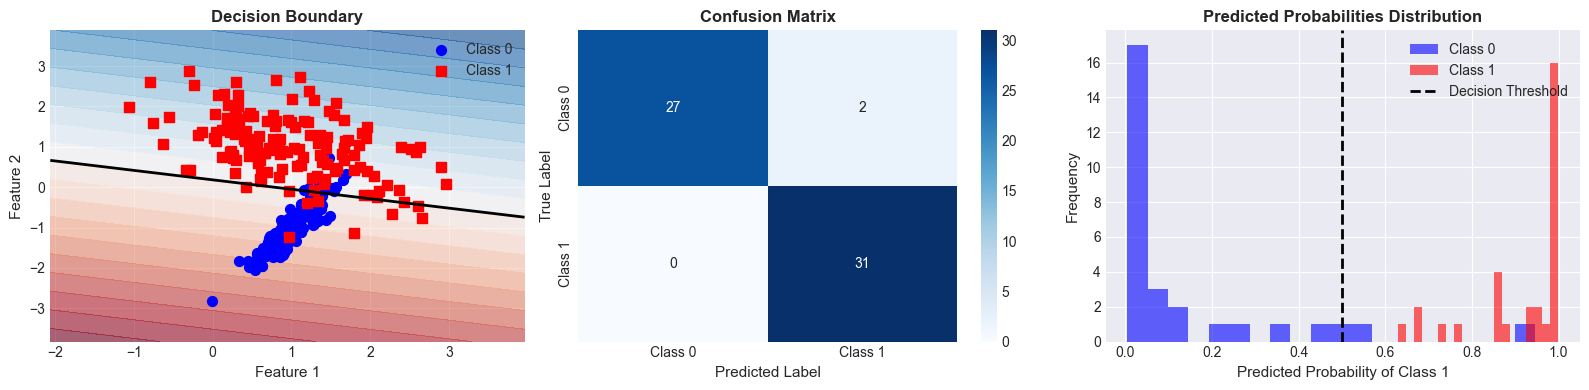

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

xx, yy = np.meshgrid(
    np.linspace(X_class[:, 0].min() - 1, X_class[:, 0].max() + 1, 100),
    np.linspace(X_class[:, 1].min() - 1, X_class[:, 1].max() + 1, 100)
)
Z = log_reg.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.6)
axes[0].contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
axes[0].scatter(X_class[y_class == 0, 0], X_class[y_class == 0, 1], 
               c='blue', marker='o', label='Class 0', s=50)
axes[0].scatter(X_class[y_class == 1, 0], X_class[y_class == 1, 1], 
               c='red', marker='s', label='Class 1', s=50)
axes[0].set_xlabel('Feature 1', fontsize=11)
axes[0].set_ylabel('Feature 2', fontsize=11)
axes[0].set_title('Decision Boundary', fontsize=12, fontweight='bold')
axes[0].legend()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axes[1].set_ylabel('True Label', fontsize=11)
axes[1].set_xlabel('Predicted Label', fontsize=11)
axes[1].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

axes[2].hist(y_pred_proba[y_class_test == 0], bins=20, alpha=0.6, label='Class 0', color='blue')
axes[2].hist(y_pred_proba[y_class_test == 1], bins=20, alpha=0.6, label='Class 1', color='red')
axes[2].axvline(0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
axes[2].set_xlabel('Predicted Probability of Class 1', fontsize=11)
axes[2].set_ylabel('Frequency', fontsize=11)
axes[2].set_title('Predicted Probabilities Distribution', fontsize=12, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

---
# Part 5: Advanced Regression Techniques

## 5.1 Support Vector Regression (SVR)

**Concept**:
- Uses support vectors (critical data points)
- Effective in high-dimensional spaces
- Can use different kernel functions

In [14]:
X_svr = np.linspace(0, 10, 100).reshape(-1, 1)
y_svr = np.sin(X_svr).ravel() + np.random.normal(0, 0.15, 100)

X_svr_train, X_svr_test, y_svr_train, y_svr_test = train_test_split(
    X_svr, y_svr, test_size=0.2, random_state=42
)

scaler_svr = StandardScaler()
X_svr_train_scaled = scaler_svr.fit_transform(X_svr_train)
X_svr_test_scaled = scaler_svr.transform(X_svr_test)

kernels = ['linear', 'rbf', 'poly']
models_svr = {}
predictions_svr = {}

for kernel in kernels:
    if kernel == 'poly':
        svr = SVR(kernel=kernel, degree=3, C=100, epsilon=0.1)
    else:
        svr = SVR(kernel=kernel, C=100, epsilon=0.1)
    svr.fit(X_svr_train_scaled, y_svr_train)
    models_svr[kernel] = svr
    predictions_svr[kernel] = svr.predict(X_svr_test_scaled)

print("Support Vector Regression Results:")
for kernel in kernels:
    r2 = r2_score(y_svr_test, predictions_svr[kernel])
    rmse = np.sqrt(mean_squared_error(y_svr_test, predictions_svr[kernel]))
    print(f"\n{kernel.upper()} Kernel:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

Support Vector Regression Results:

LINEAR Kernel:
  R² Score: -0.1472
  RMSE: 0.7795

RBF Kernel:
  R² Score: 0.9399
  RMSE: 0.1783

POLY Kernel:
  R² Score: -0.0963
  RMSE: 0.7620


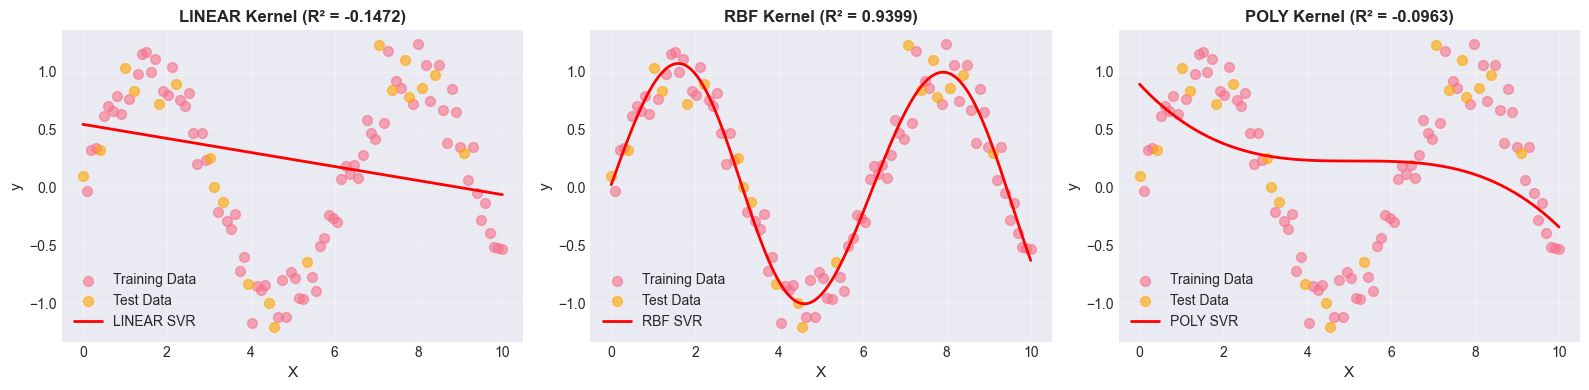

In [15]:
X_plot_svr = np.linspace(X_svr.min(), X_svr.max(), 300).reshape(-1, 1)
X_plot_svr_scaled = scaler_svr.transform(X_plot_svr)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, kernel in enumerate(kernels):
    y_plot = models_svr[kernel].predict(X_plot_svr_scaled)
    r2 = r2_score(y_svr_test, predictions_svr[kernel])
    
    axes[idx].scatter(X_svr_train, y_svr_train, s=50, alpha=0.6, label='Training Data')
    axes[idx].scatter(X_svr_test, y_svr_test, s=50, alpha=0.6, label='Test Data', color='orange')
    axes[idx].plot(X_plot_svr, y_plot, 'r-', linewidth=2, label=f'{kernel.upper()} SVR')
    axes[idx].set_xlabel('X', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'{kernel.upper()} Kernel (R² = {r2:.4f})', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5.2 Random Forest Regression

**Concept**:
- Ensemble of decision trees
- Each tree learns different patterns
- Final prediction is average of all trees

In [16]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

rf_small = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
rf_medium = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_large = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

for name, rf in [('Small', rf_small), ('Medium', rf_medium), ('Large', rf_large)]:
    rf.fit(X_tree_train, y_tree_train)
    train_r2 = rf.score(X_tree_train, y_tree_train)
    test_r2 = rf.score(X_tree_test, y_tree_test)
    print(f"Random Forest ({name}):")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}\n")

Random Forest (Small):
  Train R²: 0.8702
  Test R²: 0.7681

Random Forest (Medium):
  Train R²: 0.9758
  Test R²: 0.8410

Random Forest (Large):
  Train R²: 0.9769
  Test R²: 0.8468



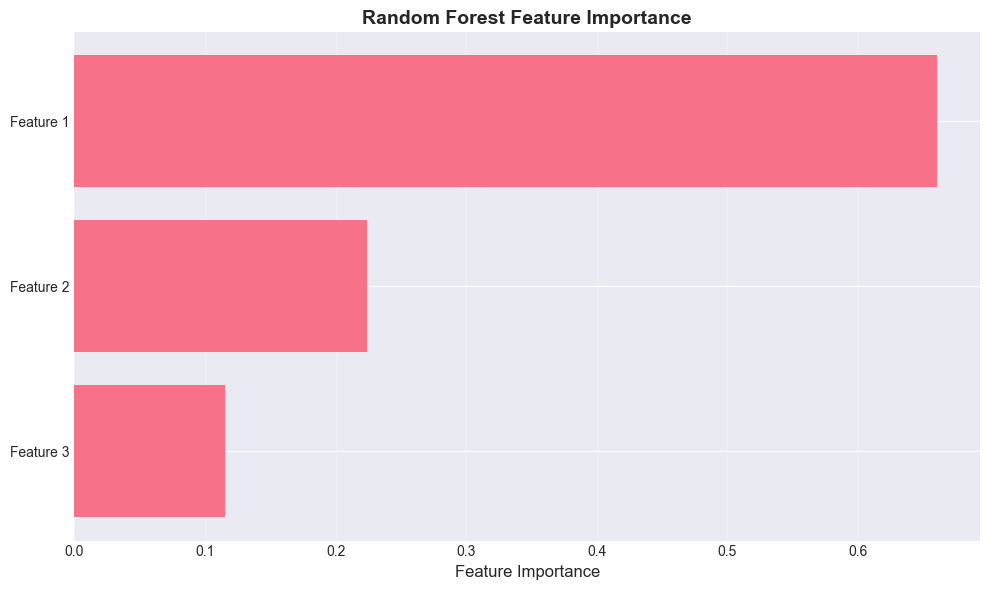

Feature Importance:
Feature 1: 0.6604
Feature 2: 0.2240
Feature 3: 0.1156


In [17]:
rf_best = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_best.fit(X_tree_train, y_tree_train)

importance = rf_best.feature_importances_
features = [f'Feature {i+1}' for i in range(X_tree_train.shape[1])]
sorted_idx = np.argsort(importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], importance[sorted_idx])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Feature Importance:")
for feat, imp in zip(features, importance):
    print(f"{feat}: {imp:.4f}")

## 5.3 Gradient Boosting Regression

**Concept**:
- Sequentially builds trees, each correcting previous errors
- More powerful than Random Forest for many problems
- Requires careful tuning to avoid overfitting

In [18]:
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_tree_train, y_tree_train)

y_pred_gb_train = gb.predict(X_tree_train)
y_pred_gb_test = gb.predict(X_tree_test)

print("Gradient Boosting Results:")
print(f"Train R²: {r2_score(y_tree_train, y_pred_gb_train):.4f}")
print(f"Test R²: {r2_score(y_tree_test, y_pred_gb_test):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_tree_train, y_pred_gb_train)):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_tree_test, y_pred_gb_test)):.4f}")

Gradient Boosting Results:
Train R²: 0.9986
Test R²: 0.8543
Train RMSE: 0.6945
Test RMSE: 8.0465


In [24]:
# Train Linear Regression and Ridge on the tree dataset
lr_tree = LinearRegression()
lr_tree.fit(X_tree_train, y_tree_train)

ridge_tree = Ridge(alpha=1.0)
ridge_tree.fit(X_tree_train, y_tree_train)

# Compare all advanced models on the SAME dataset
models_advanced = {
    'Linear Regression': lr_tree,
    'Ridge Regression': ridge_tree,
    'Random Forest': rf_best,
    'Gradient Boosting': gb
}

results = []
for name, model in models_advanced.items():
    train_r2 = model.score(X_tree_train, y_tree_train)
    test_r2 = model.score(X_tree_test, y_tree_test)
    train_rmse = np.sqrt(mean_squared_error(y_tree_train, model.predict(X_tree_train)))
    test_rmse = np.sqrt(mean_squared_error(y_tree_test, model.predict(X_tree_test)))
    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False))


Model Comparison:
            Model  Train R²  Test R²  Train RMSE  Test RMSE
Linear Regression  0.947510 0.886505    4.184079   7.101747
 Ridge Regression  0.947510 0.886505    4.184079   7.101747
    Random Forest  0.976835 0.845949    2.779567   8.273883
Gradient Boosting  0.998554 0.854300    0.694530   8.046502


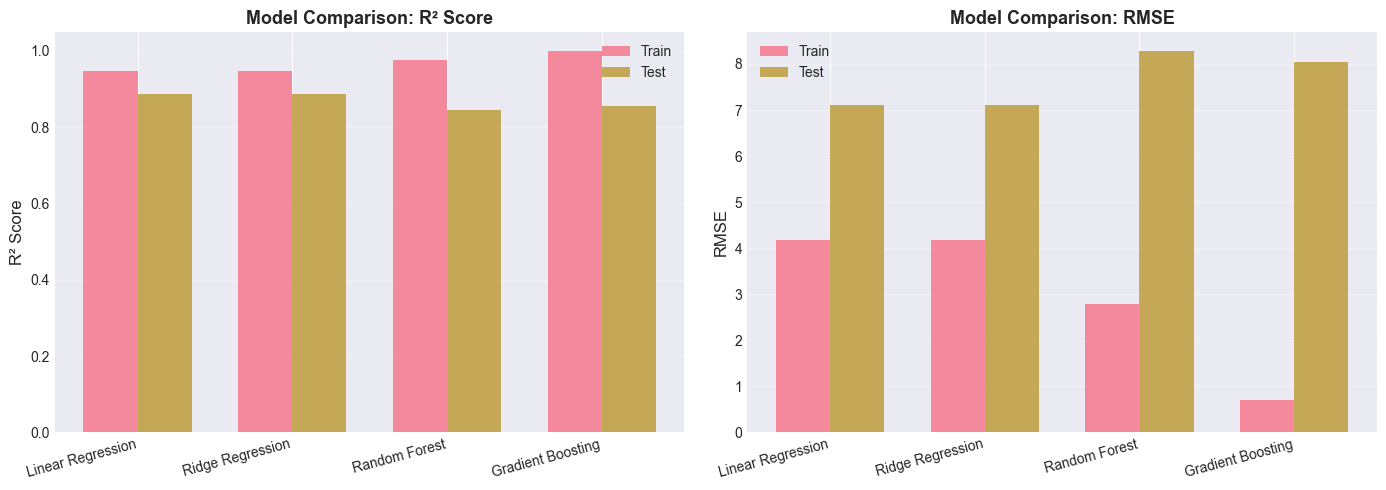

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_pos = np.arange(len(models_advanced))
width = 0.35

axes[0].bar(x_pos - width/2, results_df['Train R²'], width, label='Train', alpha=0.8)
axes[0].bar(x_pos + width/2, results_df['Test R²'], width, label='Test', alpha=0.8)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model Comparison: R² Score', fontsize=13, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(results_df['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(x_pos - width/2, results_df['Train RMSE'], width, label='Train', alpha=0.8)
axes[1].bar(x_pos + width/2, results_df['Test RMSE'], width, label='Test', alpha=0.8)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Model Comparison: RMSE', fontsize=13, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(results_df['Model'], rotation=15, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
# Part 6: Hyperparameter Tuning with GridSearchCV

## Systematic Search for Best Parameters

In [20]:
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)
}

ridge_grid = Ridge()
grid_search_ridge = GridSearchCV(
    ridge_grid, 
    param_grid_ridge, 
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search_ridge.fit(X_ridge_train, y_ridge_train)

print("GridSearchCV Results for Ridge Regression:")
print(f"Best Alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Best CV Score: {grid_search_ridge.best_score_:.4f}")
print(f"Test R² Score: {grid_search_ridge.score(X_ridge_test, y_ridge_test):.4f}")

GridSearchCV Results for Ridge Regression:
Best Alpha: 1.4384
Best CV Score: 0.9002
Test R² Score: 0.9228


In [21]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 3, 4, 5]
}

gb_grid = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(
    gb_grid,
    param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

print("Tuning Gradient Boosting (this may take a moment)...")
grid_search_gb.fit(X_tree_train, y_tree_train)

print("\nGridSearchCV Results for Gradient Boosting:")
print(f"Best Parameters: {grid_search_gb.best_params_}")
print(f"Best CV Score: {grid_search_gb.best_score_:.4f}")
print(f"Test R² Score: {grid_search_gb.score(X_tree_test, y_tree_test):.4f}")

Tuning Gradient Boosting (this may take a moment)...

GridSearchCV Results for Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best CV Score: 0.8722
Test R² Score: 0.8583


---
# Part 7: Cross-Validation and Model Evaluation

## Robust Model Assessment

In [22]:
models_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1)': Ridge(alpha=1),
    'Lasso (α=0.1)': Lasso(alpha=0.1, max_iter=5000),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

cv_results = {}
for name, model in models_cv.items():
    scores = cross_val_score(model, X_ridge_scaled, y_ridge, cv=5, scoring='r2')
    cv_results[name] = {
        'Mean': scores.mean(),
        'Std': scores.std(),
        'Scores': scores
    }
    print(f"{name}:")
    print(f"  Cross-Val Scores: {scores}")
    print(f"  Mean R²: {scores.mean():.4f} (+/- {scores.std():.4f})\n")

Linear Regression:
  Cross-Val Scores: [0.88352014 0.95022331 0.91396703 0.92439919 0.90301218]
  Mean R²: 0.9150 (+/- 0.0222)

Ridge (α=1):
  Cross-Val Scores: [0.88095918 0.95328729 0.91282984 0.92189797 0.90353242]
  Mean R²: 0.9145 (+/- 0.0237)

Lasso (α=0.1):
  Cross-Val Scores: [0.8588887  0.93365422 0.84406578 0.85152407 0.87490384]
  Mean R²: 0.8726 (+/- 0.0322)

Random Forest:
  Cross-Val Scores: [0.41789974 0.65472484 0.51295406 0.02156697 0.12075706]
  Mean R²: 0.3456 (+/- 0.2385)

Gradient Boosting:
  Cross-Val Scores: [0.33383546 0.64406115 0.50683064 0.12032966 0.33172526]
  Mean R²: 0.3874 (+/- 0.1774)



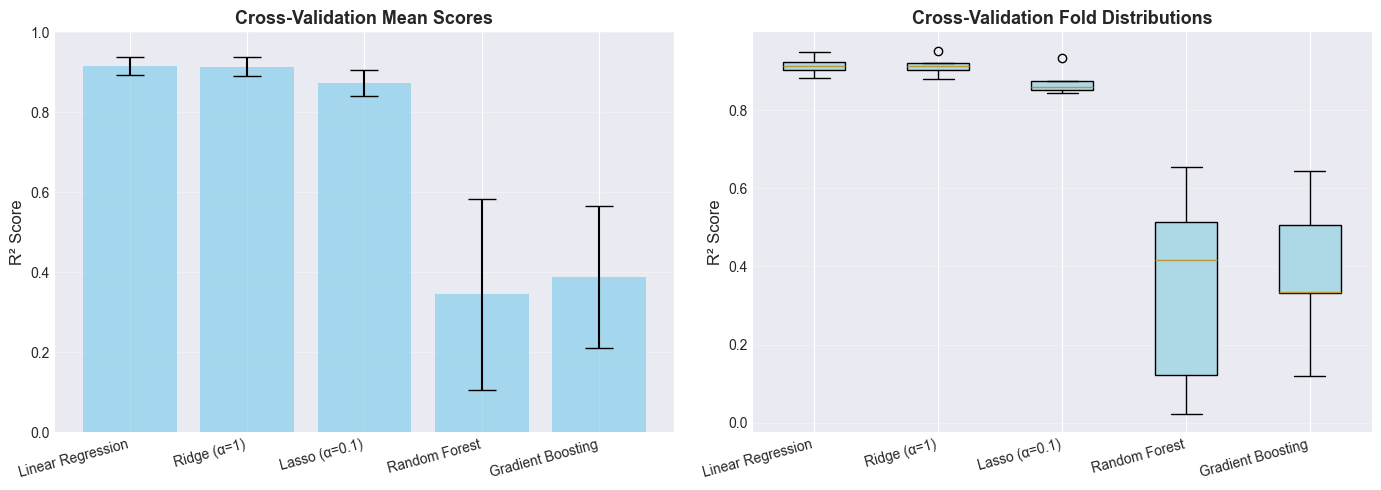

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

model_names = list(cv_results.keys())
means = [cv_results[name]['Mean'] for name in model_names]
stds = [cv_results[name]['Std'] for name in model_names]

x_pos = np.arange(len(model_names))
axes[0].bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7, color='skyblue')
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Cross-Validation Mean Scores', fontsize=13, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(model_names, rotation=15, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1])

box_data = [cv_results[name]['Scores'] for name in model_names]
bp = axes[1].boxplot(box_data, labels=model_names, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_title('Cross-Validation Fold Distributions', fontsize=13, fontweight='bold')
axes[1].set_xticklabels(model_names, rotation=15, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

---
# Part 8: Key Concepts Summary

## Regression Model Selection Guide

| Model | Best For | Pros | Cons | Complexity |
|-------|----------|------|------|------------|
| **Linear Regression** | Linear relationships | Simple, interpretable, fast | Limited to linear patterns | Low |
| **Polynomial Regression** | Non-linear patterns | More flexible than linear | Risk of overfitting | Medium |
| **Ridge Regression** | Multicollinearity | Handles correlated features | Need to tune alpha | Low |
| **Lasso Regression** | Feature selection | Automatic feature selection | May remove important features | Low |
| **SVR** | Non-linear, complex | Handles high dimensions | Hard to interpret, slow | High |
| **Random Forest** | Non-linear problems | Feature importance, robust | Less interpretable | High |
| **Gradient Boosting** | High performance | Very powerful, flexible | Prone to overfitting | Very High |

## Important Metrics

- **R² Score**: Proportion of variance explained (0-1, higher is better)
- **MSE**: Mean Squared Error (lower is better)
- **RMSE**: Root Mean Squared Error (same units as target, lower is better)
- **MAE**: Mean Absolute Error (robust to outliers, lower is better)

## Best Practices

1. **Always split data** into training and testing sets
2. **Scale features** for algorithms sensitive to feature magnitude (SVR, Linear models)
3. **Use cross-validation** for robust performance estimates
4. **Check for overfitting** - large gap between train and test performance
5. **Tune hyperparameters** using GridSearchCV or RandomizedSearchCV
6. **Visualize predictions** to understand model behavior
7. **Try multiple models** before settling on one